In [21]:
import xarray as xr
import xroms
import matplotlib.pyplot as plt
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np

# How to plot

This notebook demonstrates how to plot ROMS model output from a planview ($x$-$y$) and an $x$-$z$ cross-section.

Also, the notebook uses both matplotlib and hvplot to demonstrate static vs. interactive approaches.

All of the plots use cartopy in order to plot on a geographically-correct map with a projection and access to coastline data, etc.

## Load in data

More information at in [load_data notebook](load_data.ipynb)

In [5]:
loc = 'http://barataria.tamu.edu:8080/thredds/dodsC/forecast_latest/txla2_his_f_latest.nc'
chunks = {'ocean_time':1}
ds = xr.open_dataset(loc, chunks=chunks)

## Setup plots

In [10]:
proj = cartopy.crs.LambertConformal(central_longitude=-98, central_latitude=30)
pc = cartopy.crs.PlateCarree()

In [2]:
# def setup(ax):
    
#     ax.set_extent([-98, -87.5, 22.8, 30.5], ccrs.PlateCarree())
#     gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
#     # the following two make the labels look like lat/lon format
#     gl.xformatter = LONGITUDE_FORMATTER
#     gl.yformatter = LATITUDE_FORMATTER
#     gl.xlabels_bottom = False  # turn off labels where you don't want them
#     gl.ylabels_right = False
    
#     return ax
    

## Planview

### matplotlib (static)

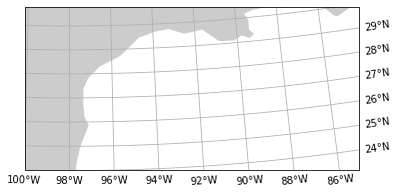

In [27]:
fig = plt.figure()
ax = plt.axes(projection=proj)
ax.set_extent([-100, -85, 24, 30], crs=pc)
ax.add_feature(cartopy.feature.LAND.with_scale('110m'), facecolor='0.8')
gl = ax.gridlines(draw_labels=True, x_inline=False, y_inline=False, xlocs=np.arange(-104,-80,2))
# manipulate `gridliner` object
gl.xlabels_top = False
gl.ylabels_left = False
# gl.xlines = False
# gl.ylines = False

ds.salt

### hvplot (interactive)

## Cross-section

### matplotlib (static)

### hvplot (interactive)